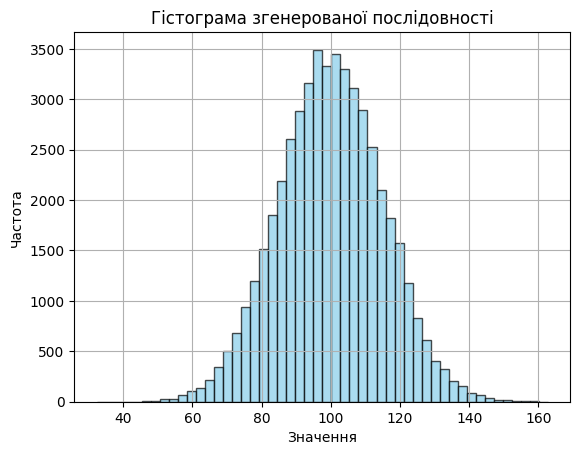

Середнє значення: 99.96
Стандартне відхилення: 14.99


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Параметри
mean_value = 100
std_dev = 15
sample_size = 50000

# Генерація даних
data = np.random.normal(loc=mean_value, scale=std_dev, size=sample_size)

# Гістограма
plt.hist(data, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Гістограма згенерованої послідовності')
plt.xlabel('Значення')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Обчислення характеристик
print(f"Середнє значення: {np.mean(data):.2f}")
print(f"Стандартне відхилення: {np.std(data, ddof=1):.2f}")

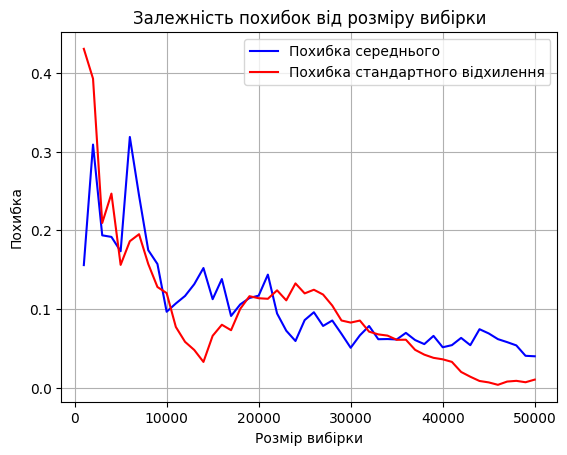

In [4]:
# Аналіз похибок при зростанні обсягу вибірки
sizes = np.arange(1000, 50001, 1000)
mean_errors = []
std_errors = []

for size in sizes:
    sample = data[:size]
    mean_errors.append(abs(np.mean(sample) - mean_value))
    std_errors.append(abs(np.std(sample, ddof=1) - std_dev))

plt.plot(sizes, mean_errors, label='Похибка середнього', color='blue')
plt.plot(sizes, std_errors, label='Похибка стандартного відхилення', color='red')
plt.title('Залежність похибок від розміру вибірки')
plt.xlabel('Розмір вибірки')
plt.ylabel('Похибка')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
import pandas as pd

# Зчитування з Excel
df = pd.read_excel('salary.xlsx', engine='openpyxl')

df.head(10)

,Працівник,Посада,Зарплата (USD),Досвід (років),Проектів завершено,Вік
0,Працівник 1,Тестувальник,2945,3,16,33
1,Працівник 2,Тестувальник,4775,2,1,40
2,Працівник 3,Тестувальник,2104,6,9,38
3,Працівник 4,Програміст,4163,6,17,32
4,Працівник 5,Програміст,4409,8,6,37
5,Працівник 6,Тестувальник,2293,5,8,36
6,Працівник 7,Програміст,1332,2,19,22
7,Працівник 8,Програміст,2697,9,4,34
8,Працівник 9,Тестувальник,1583,9,2,30
9,Працівник 10,Тестувальник,1850,2,17,30


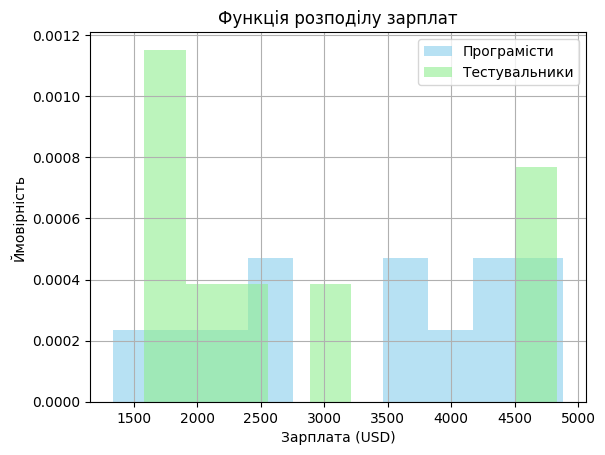

In [8]:
# Групи
devs = df[df['Посада'] == 'Програміст']['Зарплата (USD)']
testers = df[df['Посада'] == 'Тестувальник']['Зарплата (USD)']

#Гістограма зарплат
plt.hist(devs, bins=10, alpha=0.6, label='Програмісти', density=True, color='skyblue')
plt.hist(testers, bins=10, alpha=0.6, label='Тестувальники', density=True, color='lightgreen')
plt.title('Функція розподілу зарплат')
plt.xlabel('Зарплата (USD)')
plt.ylabel('Ймовірність')
plt.legend()
plt.grid(True)
plt.show()

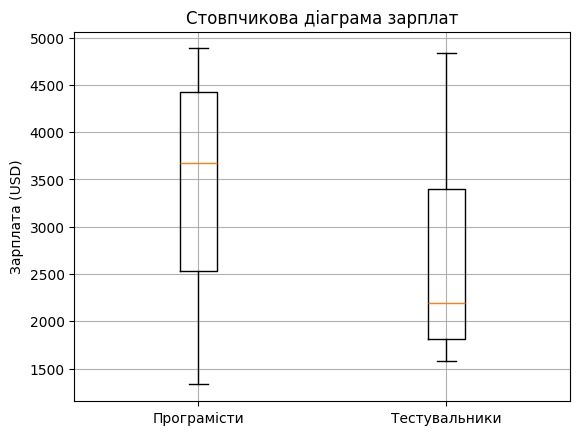

In [12]:
plt.boxplot([devs, testers], tick_labels=['Програмісти', 'Тестувальники'])
plt.title('Стовпчикова діаграма зарплат')
plt.ylabel('Зарплата (USD)')
plt.grid(True)
plt.show()

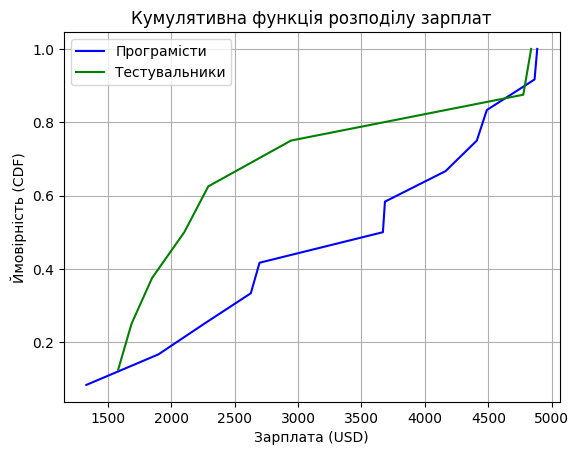

In [10]:
def plot_cdf(data, label, color):
    sorted_data = np.sort(data)
    yvals = np.arange(1, len(sorted_data)+1) / float(len(sorted_data))
    plt.plot(sorted_data, yvals, label=label, color=color)

plot_cdf(devs, 'Програмісти', 'blue')
plot_cdf(testers, 'Тестувальники', 'green')
plt.title('Кумулятивна функція розподілу зарплат')
plt.xlabel('Зарплата (USD)')
plt.ylabel('Ймовірність (CDF)')
plt.grid(True)
plt.legend()
plt.show()

In [13]:
def describe(series):
    return {
        'Середнє': round(np.mean(series), 2),
        'Медіана': round(np.median(series), 2),
        'Дисперсія': round(np.var(series, ddof=1), 2),
        'Стандартне відхилення': round(np.std(series, ddof=1), 2)
    }

print("Програмісти:", describe(devs))
print("Тестувальники:", describe(testers))

Програмісти: {'Середнє': np.float64(3415.0), 'Медіана': np.float64(3677.0), 'Дисперсія': np.float64(1472710.73), 'Стандартне відхилення': np.float64(1213.55)}
Тестувальники: {'Середнє': np.float64(2759.38), 'Медіана': np.float64(2198.5), 'Дисперсія': np.float64(1774201.98), 'Стандартне відхилення': np.float64(1331.99)}
